# 447 Sp21 exam 1 due 5p Fri May 7

***Instructions:***
- Solutions with just the answer to the question **will not** be accepted as complete solutions -- you must show your work. If you are unsure as to how much work is appropriate to show, please come and ask questions during classtime or office hours.
- Each subproblem is worth two points, 1 point for effort and 1 point for solution accuracy.
- Submit BOTH the pdf and the .ipynb notebook to canvas. You can download the .ipynb notebook by going to ```File```$\rightarrow$ ```Download``` $\rightarrow$```Download .ipynb```.


***You are welcome (and encouraged) to:***
- use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
- reuse example sourcecode and other materials provided in this course;
- consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier).

***You are not permitted to discuss the exam problems or share any part of your solutions with anyone other than the Professor or TA for this course.***
- By submitting your exam solution on Canvas, you are affirming your understanding of and adherence to these restrictions.
- We will answer questions during classtimes Monday May 3 and Wednesday May 5.
- We will also answer questions sent to our Canvas inbox or Discord DM until 5p Fri May 7.

***The exam deadline is 5p Fri May 7 on Canvas.***
- Final submissions received before this deadline will receive +1 bonus points.
- Everyone automatically receives a deadline extension to 11:59p Sun May 9. ***No further deadline extensions will be granted -- please plan accordingly.***

## problem (1.)

Sometimes, the measured output $y_{meas}$ is not the same as the output of the feedback system $y_{actual}$ due to sensor dynamics. We can model the sensor dynamics using a transfer function $H$, which is demonstrated in the following block diagram: 

![block diagram](https://drive.google.com/uc?id=1dXLVNmik117Wt_g6armzFiFlLPaSvPE3)

### subproblem (1a.)

Determine the transfer function $G_{y_{actual}r}$ from $r$ to $y_{actual}$.

---

#### solution:

same as what we did in homework. we assume ymeas=yactual and v=0. sum when fed into (+) block and multiplication when fed into other blocks. 
$G_{yr} =\frac{PC}{1+PC}$

<mark>Ben needs to rewrite this<\mark>

- $+1$ point for identifying correct transfer function and showing block diagram algebra
- $-0.5$ points if you did not show your work and only wrote down the answer (see first point on instructions)

---

### subproblem (1b.)

Let the process $P(s) = \frac{K}{(Js+b)(Ls+R)+K^2}$ (i.e., a DC motor with moment of inertia $J$, motor viscous friction constant $b$, electric resistance $R$, electric inductance $L$, and motor torque and back emf constants $K$), the controller $C(s) = k_P+k_Ds$ (i.e., a proportional-derivative controller), and the sensor dynamics $H(s) = 1$ (i.e. a perfect sensor). Assume <mark>the initial states of the process are equal to 0</mark> -- if a step input is applied to $G_{y_{actual}r}$ that you found in (1a.), what is the steady-state output? (If you couldn't find $G_{y_{actual}r}$ in (1a.), assume $G_{y_{actual}r}=\frac{PC}{1+PC}$.)

---

#### solution:

We can use sympy (see code implementation below) or algebra to find $G_{y_{actual}r}=\frac{PC}{1+PC}=\frac{Kk_P}{JLs^2+(JR+Lb)s+(K^2+Rb)}$. 

We can then apply final value theorem to obtain $\lim_{t\rightarrow\infty}y(t)=\lim_{s\rightarrow 0}sY(s)$. 

By definition, $Y(s)=R(s)G_{y_{actual}r}$, with $R=\frac{1}{s}$ for a step input. 

Therefore, $\lim_{s\rightarrow 0}sY(s) = s\frac{1}{s}G_{yr}=G_{yr}$. 
So we can plug in $s=0$ to obtain that $\fbox{$\text{ as }t\rightarrow\infty, y(t) = \frac{Kk_P}{K^2+Rb}$}$

- $-0.5$ points for not correctly applying final value theorem (e.g., you plugged in $s=0$ into $G_{y_{actual}r}$ without first defining that final value theorem states that $\lim_{t\rightarrow\infty}y(t)=\lim_{s\rightarrow 0}sY(s)$ and that $R(s)=\frac{1}{s}$)
- $-0.75$ points for not using final value theorem

In [ ]:
# we can use sympy to get the transfer function
from sympy import *
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# 1b. 
var("K J s b L R k_P k_I")
P = K/((J*s+b)*(L*s+R)+K**2)
C = k_P + k_I*s
Gyr = P*C/(1+P*C)
Gyr = Gyr.simplify().cancel()
Gyr

(K*k_I*s + K*k_P)/(J*L*s**2 + J*R*s + K**2 + K*k_I*s + K*k_P + L*b*s + R*b)

### subproblem (1c.)

Let $J=1, b=0.1, K=0.01, R= 1, L=0.5$ and hold $k_D=1$ constant. Plot the root locus of the closed-loop characteristic polynomial as $k_P$ varies.

---

#### solution:

We know from 1b. that the characteristic polynomial (i.e., the denominator of our transfer function $G_{yr}$) is:
$a(s) = (JL)s^2+(RJ+Lb+k_DK)s+(bR+K^2+k_PK) $

We can use the quadratic formula to obtain the roots of the characteristic polynomial because we know that for a second order polynomial $As^2+Bs+C$, the roots are: $s = \frac{-B\pm\sqrt{B^2-4AC}}{2A}$

In the case of our characteristic polynomial, we see that: 

$ A = JL = 0.5$

$B = RJ+Lb+k_DK = 1.06$

$C = bR+K^2 + k_PK = 0.1001 + 0.01k_P $

Plugging this back into our quadratic formula, we find that $s= -1.06 \pm \sqrt{0.9234-0.02k_P} $

From here, we can use the code we have been using to obtain our root locus plot.

A solution that uses python to obtain the roots are also below.

- $+1$ points for computing the roots and plugging in a range of $k_P$s and plotting the roots on the complex plane
- $-0.25$ for minor computational or graphing (e.g., forgot that np.sqrt does not automatically compute imaginary, applying kD as a integral controller instead of derivative controller) resulting in incorrect root locus plot
- $-0.75$ for wrong method to get eigenvalues 
- $-1$ for using control.root_locus

In [ ]:
# we can also use python to obtain the solution for 1c.
Js = 1.0
bs = .1
Ks = .01
Rs = 1.0
Ls = 0.5
k_Is = 1.0

Gyrs = Gyr.subs([(J,Js),(b,bs),(K,Ks),(R,Rs),(L,Ls),(k_I,k_Is)])
num, denom = Gyrs.as_numer_denom() # separate out numerator and denominator
denom

0.01*k_P + 0.5*s**2 + 1.06*s + 0.1001

In [ ]:
# compute roots of transfer function
solve(denom,s)

[-0.01*sqrt(-200.0*k_P + 9234.0) - 1.06, 0.01*sqrt(-200.0*k_P + 9234.0) - 1.06]

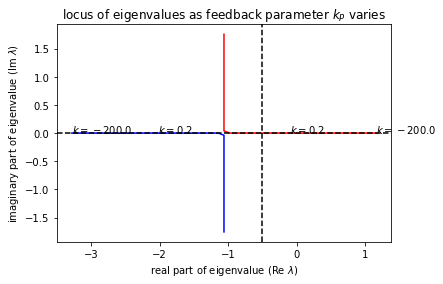

In [ ]:
# plot root locus
kps = np.linspace(-200,200,1000)
lambda1 = -.01*np.lib.scimath.sqrt(-200.*kps+9234.)-1.06
lambda2 = .01*np.lib.scimath.sqrt(-200.*kps+9234.)-1.06

#Axis labels
plt.title('locus of eigenvalues as feedback parameter $k_P$ varies')
plt.xlabel(r'real part of eigenvalue ($\operatorname{Re}\ \lambda$)')
plt.ylabel(r'imaginary part of eigenvalue ($\operatorname{Im}\ \lambda$)')

#Plotting values
plt.plot(lambda1.real,lambda1.imag,color='b')
plt.plot(lambda2.real,lambda2.imag,color = 'r')
# we'll only annotate every 10 of the computed eigenvalues
for k,lam1,lam2 in list(zip(kps,lambda1,lambda2))[::500]:
  plt.annotate(r'$k=%0.1f$'%k,xy=(lam1.real,lam1.imag))
  plt.annotate(r'$k=%0.1f$'%k,xy=(lam2.real,lam2.imag))

#x- and y- limits and drawing axes
ylim = plt.ylim()
plt.plot(np.zeros(2)-.5,ylim,'k--')
xlim = plt.xlim()
plt.plot(xlim,np.zeros(2),'k--')
plt.xlim(xlim); plt.ylim(ylim);
plt.show()

### subproblem (1d.)

Determine the range of $k_P$ that results in a stable closed-loop system *with the real part of the roots less than $-0.5$*. You may do this analytically (e.g. pen-and-paper) or numerically (e.g. using the root locus from (1c.)). If you could not get a solution for subproblem 1a, use $G_{y_{actual}r} = \frac{PC}{1+PC}$.

---

#### solution: 

two cases to consider: first case when thing in square root is assumed to be non-negative. in that case, the only way to be larger than -0.5 is if thing in square root term is greater than 0.56, and thus:
$0.56^2 < 0.9234-0.02k_P $
plug into wolframalpha at this point: 0.56^2 < 0.9234 - 0.02x and you'll see that this holds true as long as x = $k_P$ < 30.49. as long as $k_P$ > 30.49, real part of root is less than -0.5.
second case to consider is when thing in square root is assumed to be negative. in that case, the real part of the root is -1.06 < -0.5. So as long as $k_P > 30.49 $ we will have stability consistent with question. 

<mark>Ben needs to rewrite this<\mark>

- Both computational (using fzero or other python function) or analytical (solving for the roots) were accepted
- $-1$ points for trying to do it visually using the root locus plot and getting in the right ballpark (within one order of magnitude)
- $-0.25$ for algebraic errors
- $-0.25$ for having upper limit
- $-0.5$ for finding real part of the root less than 0
- if you just said all values of $k_P$ are valid, you got $0.5$ points total 

In [ ]:
# computational solution for 1d.
# find where real part of first lambda is less than -0.5

lam1,lam2 = solve(denom,s)
display(lam1) # lam1 will always be negative regardless of value of k_P chosen (we also knew this from 1c)
display(lam2) # lam2 can be positive or negative
kp_min = solve(lam2+.5,k_P)
kp_min

-0.01*sqrt(-200.0*k_P + 9234.0) - 1.06

0.01*sqrt(-200.0*k_P + 9234.0) - 1.06

[30.4900000000000]

## problem (2.)

Consider the following process model:

$$ P(s) = \frac{b(s)}{a(s)} = \frac{b_1 s^2 + b_2 s + b_3}{a_0 s^3 + a_1 s^2 + a_2 s + a_3} $$

where $b_1,b_2,b_3$ and $a_0,a_1,a_2,a_3$ are nonzero parameters.

### subproblem (2a.)

Suppose $a_0 = -1$, $a_2 = -3$, $a_3 = -2$; what range of values for $a_1$ ensure $P$ is stable? You *cannot* use computational tools to obtain the range of values -- you must do any calculations by hand and show your work. 

---

#### solution:

The most direct solution to this problem is to apply the Ruth-Hurwitz stability criterion to the denominator polynomial of the transfer function. Recall that for an LTI system, the characteristic polynomial is the same as the denominator of the transfer function.

$$D(s) = a_0s^3+a_1s^2+a_2s+a_3$$

The Ruth-Hurwitz criterion for a third order system are typically given for a 3rd degree polynomial of the form:

$$P(s) = s^3+a_2's^2+a_1's+a_0'.$$

Importantly, notice that in the Ruth-Hurwitz criterion the coefficient on $s^3$ is one. This indicates that to apply this criterion to our system, we first need to divide the denominator polynomial by $\cfrac{1}{a_0}$. This gives

$$\cfrac{1}{a_0}D(s) = s^3+\cfrac{a_1}{a_0}s^2+\cfrac{a_2}{a_0}s+\cfrac{a_3}{a_0} = s^3 + a_2's^2+a_1's+a_0' = P(s).$$

This equality immediately establishes some identities that we need to use the Ruth-Hurwitz criterion:

$$a_0' = \cfrac{a_3}{a_0} = 2$$
$$a_1' = \cfrac{a_2}{a_0} = 3$$
$$a_2' = \cfrac{a_1}{a_0} = -a_1$$

Now we are ready to apply the criterion: the system is stable if and only if $a_2',a_1', a_0' > 0$ and $a_2'a_1' > a_0'$. These requirements in turn imply that

$$\cfrac{a_3}{a_0} =  2 > 0$$
$$\cfrac{a_1}{a_0} = 1 > 0$$
$$\cfrac{a_2a_1}{a_0^2} = -3a_1 > a_0' = 2$$

The system is stable if and only if $a_1 < -\frac{2}{3}$ and $a_2' > 0 \leftrightarrow a_1 < 0$. Therefore $\fbox{$a_1 <-\frac{2}{3}$ will ensure the system is stable.}$

- $-0.5$ points for forgetting to divide through by $a_0$
- $+1$ points (full credit) given if you didn't use Routh Hurwitz but got the correct solution without using computation (e.g., you computed the roots of a third order polynomial by hand)
- no points taken off for minor mistakes (e.g., $<$ is flipped)

---

## problem (3.)

Consider a simplified dynamics of vehicle steering, where the orientation $\theta$ of the vehicle is controlled by the steering angle $\delta$. The states of the system are $y,\theta$, with $y$ being the position of the center of mass of the car and $\theta$ as the orientation of the vehicle. We define the nonlinear system $(\text{NL}$): 

$$ \dot{y}=v_0\sin(\alpha(\delta)+\theta), \text{   } \dot{\theta}=\frac{v_0 \sin \alpha(\delta)}{a},\text{   where } \alpha(\delta)=\arctan(\frac{a\tan \delta}{b})$$

Let $a$ be the distance between the center of mass of the car and the rear wheel, and $b$ be the wheelbase.  

### subproblem (3a.)

Let $v_0=30 \text{ mph}, a=1.5\text{ m}, b=3\text{ m}, \delta=0$. Create a phase portrait of $(\text{NL})$ on the square $x_1,x_2\in(-1.5,+1.5)$ <mark>where $x_1, x_2$ are the states of the system</mark>:  use ``plt.quiver`` or ``plt.streamplot`` as in the examples presented in lecture / provided on homework solutions. 

---

#### Solution:

The key here was to plot the phase portrait of the nonlinear equation. See code below for how to plot a nonlinear phase portrait. 

- $-0.25$ points for *correctly* linearizing and plotting the linearized phase portrait of $\text{(NL)}$
- $-0.5$ points if you *incorrectly* linearized the system and plotted the wrong phase portrait.

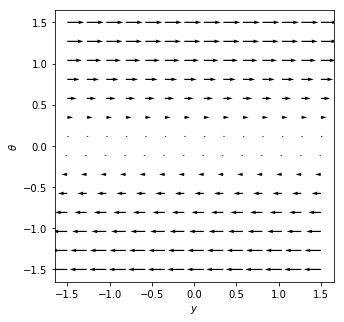

In [ ]:
# code for 3a.
v0 = 30 # mph
a = 1.5 # meters offset
b = 3. # meters wheelbase
u = 0 # is also delta

def f(t,x,u):
    x1, x2 = x
    delta = 0.0
    ad = np.arctan(a*np.tan(delta)/b)
    dx1 = v0*np.sin(ad+x2)
    dx2 = v0*np.sin(ad)/a
    return np.array([dx1, dx2])

# phase portrait / "quiver" plot
fig,ax = plt.subplots(figsize=(5,5))
Q, Qd = np.meshgrid(np.linspace(-1.5,+1.5, 14), np.linspace(-1.5, +1.5, 14))
dQ,dQd = np.asarray([f(0.,(q,dq),0.).flatten() for q,dq in zip(Q.flatten(),Qd.flatten())]).T
dQ,dQd = dQ.reshape(dQ.shape),dQd.reshape(Qd.shape)
ax.quiver(Q,Qd,dQ,dQd)
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$\theta$')
plt.show()

---
### subproblem (3b.)

Consider the phase portrait below. Visually inspect and identify all equilibrium point(s); are the equilibrium point(s) stable or unstable and why?

*Alt text: A graph labeled $x_1$ on the horizontal axis and $x_2$ on the vertical axis spanning $-1.5 < x_1 < 1.5, -1.5 < x_2 < 1.5$. Above the $x_2$ axis, horizontal arrows point towards the right increasing in length as $x_2$ increases in value. Below the $x_2$ axis, horizontal arrows point towards the left increasing in length as $x_2$ decreases in value.*


![phase portrait](https://drive.google.com/uc?id=1X_z0uWBIpQh50o_WHYTzulS7XIsKUkGp)

---

#### solution:
It can be seen that all the points of $x_2 = 0$ are equilibrium points because the arrows get smaller and smaller as we approach the $x_2$ axis. These points are unstable because a small movement of $x_2$ will cause the diverging of the states.

- +0.5 points for correctly identifying that all points on $x_2=0$ is the equilibrium point. Identifying $x_1 = x_2 = 0$ as the equilibrium point was +0.25 points 
- +0.5 points for correctly identifying that the equilibrium points are unstable

---

## problem (4.)

Consider the nonlinear system 

$$\dot{q_1} = q_1 -q_2 - q_1(q_1^2+q_2^2)+u$$
$$\dot{q_2} = q_1 + q_2 - q_2(q_1^2+q_2^2)$$

### subproblem (4a.)

Linearize the nonlinear system about its equilibrium point $(x_e,u_e)=(0,0)$, that is find matrices $A, B$ such that $\dot{x} = Ax+Bu$ for $x,u$ near $x_e,u_e$

---

#### solution:

In state-space form, the nonlinear system is
$$\dot{x} = \frac{d}{dt} \left[\begin{matrix} q_1 \\ q_2 \end{matrix}\right] = \left[\begin{matrix} -q_1^3 - q_1q_2^2 + q_1 - q_2 +u \\ -q_2^3 - q_1^2q_2 + q_1 + q_2 \end{matrix}\right] = f(x).$$

We know that $A=\frac{df}{dx}|_{(x_e,u_e)}, B = \frac{df}{du}|_{(x_e,u_e)}$. Define $x_1 = q_1, x_2 = q_2, u = u,$
  $$ f_1(x,u)=\dot{q_1} = q_1 -q_2 -q_1(q_1^2+q_2^2) + q_2u$$
  $$f_2(x,u) = \dot{q_2} = q_1 + q_2 - q_2(q_1^2+q_2^2)$$

  First find $A=\frac{df}{dx}|_{(x_e,u_e)}=\left[\begin{matrix}\frac{df_1}{dx_1} & \frac{df_1}{dx_2} \\ \frac{df_2}{dx_1} & \frac{df_2}{dx_2}\end{matrix}\right]|_{(x_e,u_e)} = \left[\begin{matrix} -3q_1^2-q_2^2+1 & -2q_1q_2-1 \\ -2q_1q_2+1 & -3q_2^2-q_1^2+1 \end{matrix}\right]|_{([0,0],0)} = \fbox{$A=\left[\begin{matrix}1 & -1\\ 1 & 1\end{matrix}\right]$}$

  Next find $B = \frac{df}{du}|_{(x_e,u_e)} = \left[\begin{matrix}\frac{df_1}{du} \\ \frac{df_2}{du}\end{matrix}\right]|_{(x_e,u_e)} = \fbox{$B=\left[\begin{matrix}1 \\ 0\end{matrix}\right]$}$.

---

### subproblem (4b.)

Let $u=-k_Pq_2$. Does there exist a $k_P$ such that the closed-loop system is stable, and if so, give one such $k_P$. If not, explain why. 

---

#### solution:
First, the open-loop stability:
Eigenvalues are determined by the fomula $$\operatorname{det}(A-\lambda I) = 0$$

$\operatorname{det}\left(\left[\begin{matrix} 1 & -1 \\ 1 & 1 \end{matrix}\right] - \lambda\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right]\right) = 0$   

$\Leftrightarrow\lambda = 1+i, 1-i$\
It can be seen that the system is unstable.

If $u=-k_Pq_2$,
in state-space form, the nonlinear system is
$$\dot{x} = \frac{d}{dt} \left[\begin{matrix} q_1 \\ q_2 \end{matrix}\right] = \left[\begin{matrix} -q_1^3 - q_1q_2^2 + q_1 - q_2 -k_Pq_2 \\ -q_2^3 - q_1^2q_2 + q_1 + q_2 \end{matrix}\right] = f(x).$$

The Jacobian derivative of $f$ with respect to $x$ is
$$ \partial_q f = \left[\begin{matrix} \partial_{q_1} \dot{q}_1 &  \partial_{q_2} \dot{q}_1 \\  \partial_{q_1} \dot{q}_2 &  \partial_{q_2} \dot{q}_2 \end{matrix}\right] = \left[\begin{matrix} -3q_1^2-q_2^2+1 & -2q_1q_2-1 - k_p \\ -2q_1q_2+1 & -3q_2^2-q_1^2+1 \end{matrix}\right].$$

Evaluating the Jacobian at $x_e = 0$ yields
$$\partial_q f(q_e) = \boxed{\left[\begin{matrix} 1 & -1 - k_p \\ 1 & 1 \end{matrix}\right] = A}$$

Similarly, the eigenvalue can be determined by:

$\operatorname{det}\left(\left[\begin{matrix} 1 & -1-kp \\ 1 & 1 \end{matrix}\right] - \lambda\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right]\right) = 0$   

Solve it and we have:

$\lambda = 1 \pm \sqrt{-k_p - 1}$

It can be seen that regardless of $k_p$, one of the eigenvalue is always positive, thus there is no $k_p$ such that the closed-loop system is stable

- $+0.5$ points for placing $k_p$ in the correct location in the $A$ matrix
- $+0.5$ points for correctly solving for $\lambda$ and identifying that the system is unstable regardless of the $k_p$ chosen because one of the eigenvalues will always be positive

---

## problem (5.)

Consider modeling the velocity of an underwater vehicle as 

$$ \dot{q}_1 = aq_2^3-bq_1|q_1| $$
$$ \dot{q}_2 = cu - dq_2^3 $$

 where <mark>$q_1,q_2$ are the states of the system, with</mark> $q_1$ being the horizontal velocity of the hull and $q_2$ being the velocity of the propellor that drives the hull. Assume $a,b,c,d > 0$ The term $aq_2^3$ relates propellor speed to the boat acceleration, while $-bq_1|q_1|$ is damping on the boat velocity. In the second equation, $cu$ is how the motor torques affect the propellor speed, and $-dq_2^3$ is damping on the propellor speed.

### subproblem (5a.)

Find an equilibrium point $x_e,u_e$ such that $q_1=1$ (ie the underwater vehicle is moving with a constant speed of 1).

---

#### solution:

To begin, first we must determine what the statespace is for this system. The equations given are two *first-order* differential equations, hence the statespace 
is $\mathbb{R}^2$. For example, a valid coordinate representation of the state space is $x = (q_1, q_2)$. Notice that there are no *derivatives* in the state vector $x$: this is because the DEs are first-order and not second-order.

The value of $q_1$ at equilibrium is given, and so we need to compute the value of $q_2$ and $u$ at equilibrium. Let $x_e = (q_{1e},q_{2e}) = (1, q_{2e})$. Then from the DE above, $x_e$ and $u_e$ must satsify:

$$
aq_{2e}^3-b|q_{1e}|q_{1e} = aq_{2e}^3-b = 0
$$

$$
cu_e-dq_{2e}^3 = 0
$$

From these equations, we see that 
$$q_{2e} = \left(\cfrac{b}{a}\right)^{1/3}$$ 

and

$$ u_e = \cfrac{db}{ca} $$

hence $x_e = \left(1, \cfrac{b^{1/3}}{a^{1/3}}\right)$ and $u_e = \cfrac{db}{ca}$

- $-0.25$ points for not identifying that the states are $(q_1, q_2)$. 

---
